### *Import Data & Plots*

In [2]:
# IMPORTO I DATI PER VOTTIGNASCO
import os
import numpy as np

# Ottieni il percorso effettivo da una variabile d'ambiente
work_path = os.environ['WORK']  # Ottieni il valore della variabile d'ambiente WORK
v_test_OHE_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_month_OHE.npy")
v_test_image_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_normalized_image_sequences.npy")
v_test_target_dates_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_target_dates.npy")

# Carica l'array numpy dai file
vottignasco_test_OHE    = np.load(v_test_OHE_path)
vottignasco_test_image  = np.load(v_test_image_path)
vottignasco_test_dates  = np.load(v_test_target_dates_path)


print(len(vottignasco_test_dates))
print(len(vottignasco_test_image))
print(len(vottignasco_test_OHE))

105
105
105


In [16]:
# Calcolo del valore medio di Salinecy per stagione per ogni istanza di Vottignasco

vottignasco_test_images_dates = np.load("/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_image_sequences_dates.npy")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy


def get_index_range_for_season(seasons):
  indices_range_season = []  # sarà istanziata con triplette (start_index, end_index, season) per ogni stagione

  season_prev = seasons[0]  # Inizializzo con la prima stagione al time-step 0
  start_index = 0

  for i, season in enumerate(seasons):
    if (season != season_prev):
      #print("Ok è cambiata la stagione al time-step", i)
      indices_range_season.append((start_index, i-1, season_prev))
      season_prev = season
      start_index = i

    # Caso in cui negli ultimi time step ho una stagione differente!
    if (i==103):
      last_triple = indices_range_season[-1:]
      if (last_triple[0][2] != season_prev):
        indices_range_season.append((last_triple[0][1] + 1, 103, seasons[103]))

  return indices_range_season

def get_season(day):
  spring = np.arange(80, 172)
  summer = np.arange(172, 264)
  fall = np.arange(264, 355)

  if day in spring:
    season = 'Spring'
  elif day in summer:
    season = 'Summer'
  elif day in fall:
    season = 'Autumn'
  else:
    season = 'Winter'

  return season

def plot_sv_mean_per_season(sv_nr_instance, nr_instance, cmap="PuBu"):
  date_target = vottignasco_test_dates[nr_instance].astype('datetime64[D]')

  x1_i = copy.deepcopy(vottignasco_test_image[nr_instance])
  x1_i_dates = copy.deepcopy(vottignasco_test_images_dates[nr_instance])

  dates = pd.to_datetime(x1_i_dates)

  tm_days = [date.timetuple().tm_yday for date in dates]
  seasons = [get_season(tm_yday) for tm_yday in tm_days]

  # Ottieni le triplette (indice_iniziale, indice_finale, stagione)
  indices_range_season = get_index_range_for_season(seasons)

  # Nel caso di 9 stagioni creo un griglia 3x4, altrimenti 2x4
  if len(indices_range_season) == 9:
    # Imposta i plot in una griglia 3x4
    fig, axes = plt.subplots(3, 4, figsize=(15, 14))
  else:
    fig, axes = plt.subplots(2, 4, figsize=(15, 14))
  axes = axes.flatten()  # Converti la matrice di subplot in una lista

  # Trova i valori minimo e massimo per la colorbar
  vmin = np.min(sv_nr_instance)
  vmax = np.max(sv_nr_instance)

  for i, (index_start, index_end, season) in enumerate(indices_range_season):
      if index_start == index_end:
          sv_mean_season = sv_nr_instance[index_start]
      else:
          sv_mean_season = np.mean(sv_nr_instance[index_start:index_end], axis=0)

      im = axes[i].imshow(sv_mean_season, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')
      year = x1_i_dates[index_end].astype('datetime64[Y]').astype(int) + 1970
      axes[i].set_title(f'Mean Saliency-Video - {season}, {year}', fontdict={'fontsize': 10})
      x_ticks = np.arange(0, 8, step=1)  # crea tick ogni 1
      axes[i].set_xticks(x_ticks)

  # Disattiva gli assi vuoti
  for j in range(i + 1, len(axes)):
      axes[j].axis('off')

  # Riduci lo spazio bianco tra i subplot
  plt.tight_layout()

  if len(indices_range_season) == 9:
    # Aggiusta i margini e riduci ulteriormente hspace e wspace per avvicinare i subplot
    fig.subplots_adjust(left=0.05, right=0.85, top=0.92, bottom=0.40, hspace=0.12, wspace=0.12)
    # Aggiungi la colorbar a destra dei subplot
    cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.05, use_gridspec=True, aspect=25)
  else:
    fig.subplots_adjust(left=0.05, right=0.85, top=0.92, bottom=0.60, hspace=0.15, wspace=0.15)
    cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.05, use_gridspec=True, aspect=16)

  cbar.set_label('Saliency', fontsize=11)

  # Titolo principale
  fig.suptitle(f'Mean Saliency-Video per Season on instance no. {nr_instance}, Date: {date_target}', fontsize=16)

  # Salva la figura con dpi=400
  #plt.savefig(f'/content/sv_per_season_vott_norm_{nr_instance}.png', dpi=400, bbox_inches='tight')
  #plt.savefig(f'./MyDrive/Water_Resources/results/spatial-temporal/sv_mean_per_season/sv_per_season_vott_norm_{nr_instance}.png', dpi=400, bbox_inches='tight')

  plt.show()
  plt.close(fig)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_auc(x, y):
    """
    Calcola l'area sotto la curva (AUC) utilizzando il metodo del trapezio.

    :param x: Valori dell'asse x (frazione dei pixel/frame inseriti).
    :param y: Valori dell'asse y (errori calcolati).
    :return: Area sotto la curva.
    """
    return np.trapz(y, x)

def plot_combined_curves(all_errors_insertion, all_errors_deletion, parameter_combinations, title="", save_path=""):
    # Creazione della figura e dei due subplot (1 riga, 2 colonne)
    fig, axs = plt.subplots(1, 2, figsize=(11, 5))

    # # Plot per la curva di inserimento
    # max_len_insertion = max(map(len, all_errors_insertion))
    # padded_array_insertion = np.full((len(all_errors_insertion), max_len_insertion), np.nan)
    # for i, row in enumerate(all_errors_insertion):
    #     padded_array_insertion[i, :len(row)] = row  # Riempie solo le parti esistenti
    mean_errors_for_insertion_vott = np.nanmean(all_errors_insertion, axis=0)

    #x_insertion = np.arange(0, mean_errors_for_insertion_vott.shape[0])
    x_insertion = np.linspace(0, 1, mean_errors_for_insertion_vott.shape[0])
    auc_insertion = calculate_auc(x_insertion, mean_errors_for_insertion_vott)
    auc_text_insertion = f'AUC = {auc_insertion:.2f}'
    axs[0].plot(x_insertion, mean_errors_for_insertion_vott, label=f'Error Curve, {auc_text_insertion}')
    #axs[0].scatter(x_insertion, mean_errors_for_insertion_vott, color='blue', zorder=3)


    axs[0].fill_between(x_insertion, mean_errors_for_insertion_vott, color='skyblue', alpha=0.4)
    axs[0].set_xlabel('Fraction of pixels inserted')
    axs[0].set_ylabel('Mean Squared Error')
    axs[0].grid(True, linestyle='--', alpha=0.6)
    axs[0].set_title('Mean Insertion Metric Curve')
    axs[0].legend()

    # # Plot per la curva di cancellazione
    # max_len_deletion = max(map(len, all_errors_deletion))
    # padded_array_deletion = np.full((len(all_errors_deletion), max_len_deletion), np.nan)
    # for i, row in enumerate(all_errors_deletion):
    #     padded_array_deletion[i, :len(row)] = row  # Riempie solo le parti esistenti
    # mean_errors_for_deletion_vott = np.nanmean(padded_array_deletion, axis=0)
    mean_errors_for_deletion_vott = np.nanmean(all_errors_deletion, axis=0)

    #x_deletion = np.arange(0, mean_errors_for_deletion_vott.shape[0])
    x_deletion = np.linspace(0, 1, mean_errors_for_deletion_vott.shape[0])
    auc_deletion = calculate_auc(x_deletion, mean_errors_for_deletion_vott)
    auc_text_deletion = f'AUC = {auc_deletion:.2f}'

    axs[1].plot(x_deletion, mean_errors_for_deletion_vott, label=f'Error Curve, {auc_text_deletion}')
    #axs[1].scatter(x_deletion, mean_errors_for_deletion_vott, color='red', zorder=3)
    axs[1].fill_between(x_deletion, mean_errors_for_deletion_vott, color='lightcoral', alpha=0.4)
    axs[1].set_xlabel('Fraction of pixels removed')
    axs[1].set_ylabel('Mean Squared Error')
    axs[1].grid(True, linestyle='--', alpha=0.6)
    axs[1].set_title('Deletion Mean Metric Curve')
    axs[1].legend()

    # Aggiungi il titolo globale
    plt.suptitle(title, fontsize=16)
    # Mostra i plot
    plt.tight_layout()

    # Salva la figura con DPI 400
    #plt.tight_layout()
    #plt.subplots_adjust(top=0.85)  # Per evitare che il titolo si sovrapponga ai grafici
    #plt.savefig(save_path, dpi=400)

    plt.show()

    return auc_insertion, auc_deletion

In [4]:
import matplotlib.pyplot as plt

def plot_multiple_auc_comparisons(data, labels=None, title='AUC Comparison for Different Parameters'):
    """
    Plotta uno scatter plot comparativo delle AUC per più combinazioni di parametri.
    
    Args:
    - data (list of lists): Ogni sotto-lista ha coppie [AUC, configurazione]
    - labels (list): Etichette per ogni serie di dati (opzionale)
    - title (str): Titolo del grafico
    """
    
    plt.figure(figsize=(12, 6))
    
    # Se non ci sono labels, crea etichette generiche (Set 1, Set 2, ...)
    if labels is None:
        labels = [f'Set {i+1}' for i in range(len(data))]
    
    # Iterare sui dati e plottare ciascun set
    for i, auc_param_list in enumerate(data):
        auc_values = [item[0] for item in auc_param_list]
        configurations = [item[1] for item in auc_param_list]
        plt.scatter(configurations, auc_values, label=labels[i])
    
    # Personalizzazioni del plot
    plt.title(title)
    plt.xlabel('Configurations')
    plt.ylabel('AUC')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Parameter Sets")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
import matplotlib.pyplot as plt

def plot_auc_comparison(all_param_auc_insertion, all_param_auc_deletion):
    """
    Plotta due scatter plot affiancati (1x2) per confrontare le AUC delle metriche insertion e deletion.

    Args:
    - all_param_auc_insertion (list): Lista di tuple/liste [AUC, configurazione] per insertion.
    - all_param_auc_deletion (list): Lista di tuple/liste [AUC, configurazione] per deletion.
    """
    
    # Separare le AUC e le configurazioni per insertion
    auc_values_insertion = [item[0] for item in all_param_auc_insertion]
    configurations_insertion = [item[1] for item in all_param_auc_insertion]

    # Separare le AUC e le configurazioni per deletion
    auc_values_deletion = [item[0] for item in all_param_auc_deletion]
    configurations_deletion = [item[1] for item in all_param_auc_deletion]

    # Impostare la figura con due subplot affiancati (1x2)
    plt.figure(figsize=(15, 6))

    # Primo subplot: Insertion
    plt.subplot(1, 2, 1)
    plt.scatter(configurations_insertion, auc_values_insertion, color='blue')
    plt.title('AUC Mean Insertion Values')
    plt.xlabel('Configurations')
    plt.ylabel('AUC')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

    # Secondo subplot: Deletion
    plt.subplot(1, 2, 2)
    plt.scatter(configurations_deletion, auc_values_deletion, color='red')
    plt.title('AUC Mean Deletion Values')
    plt.xlabel('Configurations')
    plt.ylabel('AUC')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

    # Ottimizzare il layout
    plt.tight_layout()
    plt.show()

### *Exponential Kernel*

In [15]:
total_auc_param_insertion = []
total_auc_param_deletion  = []

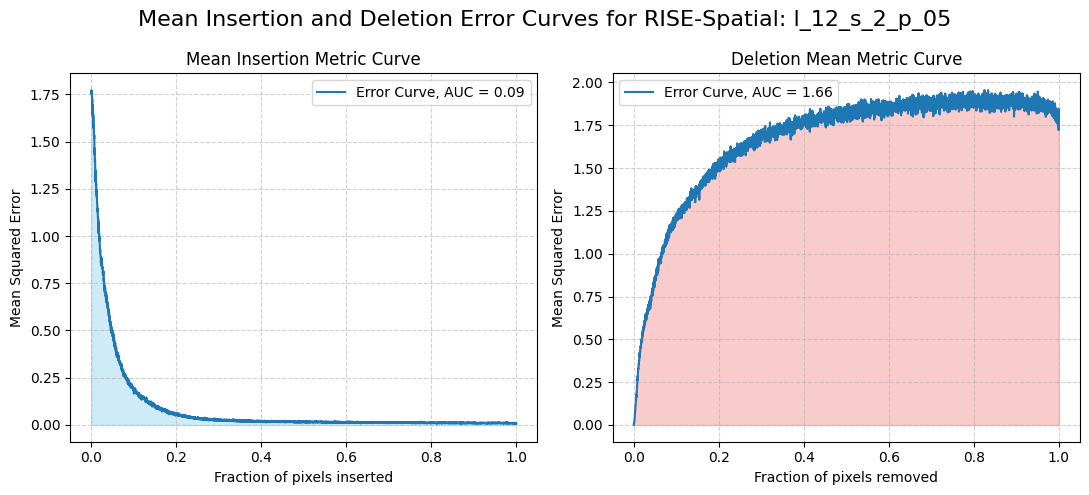

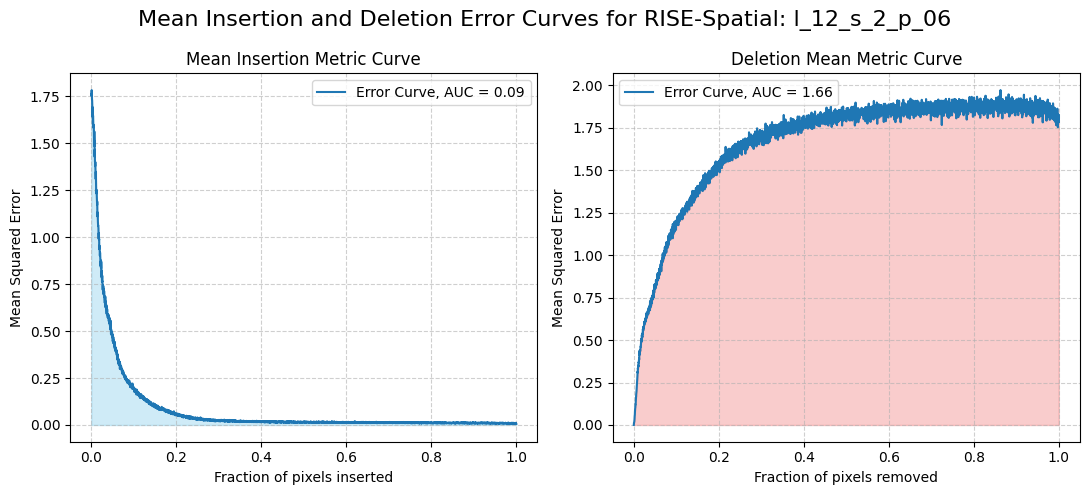

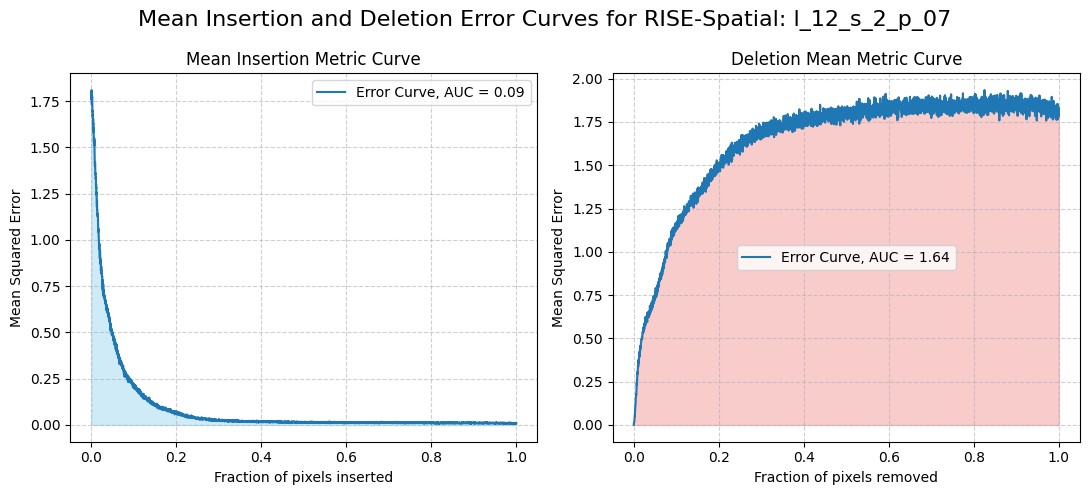

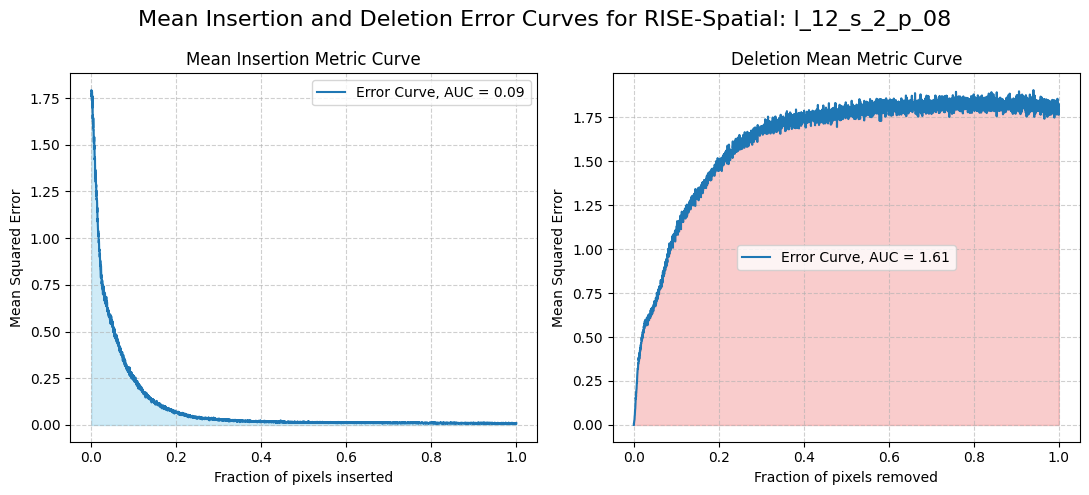

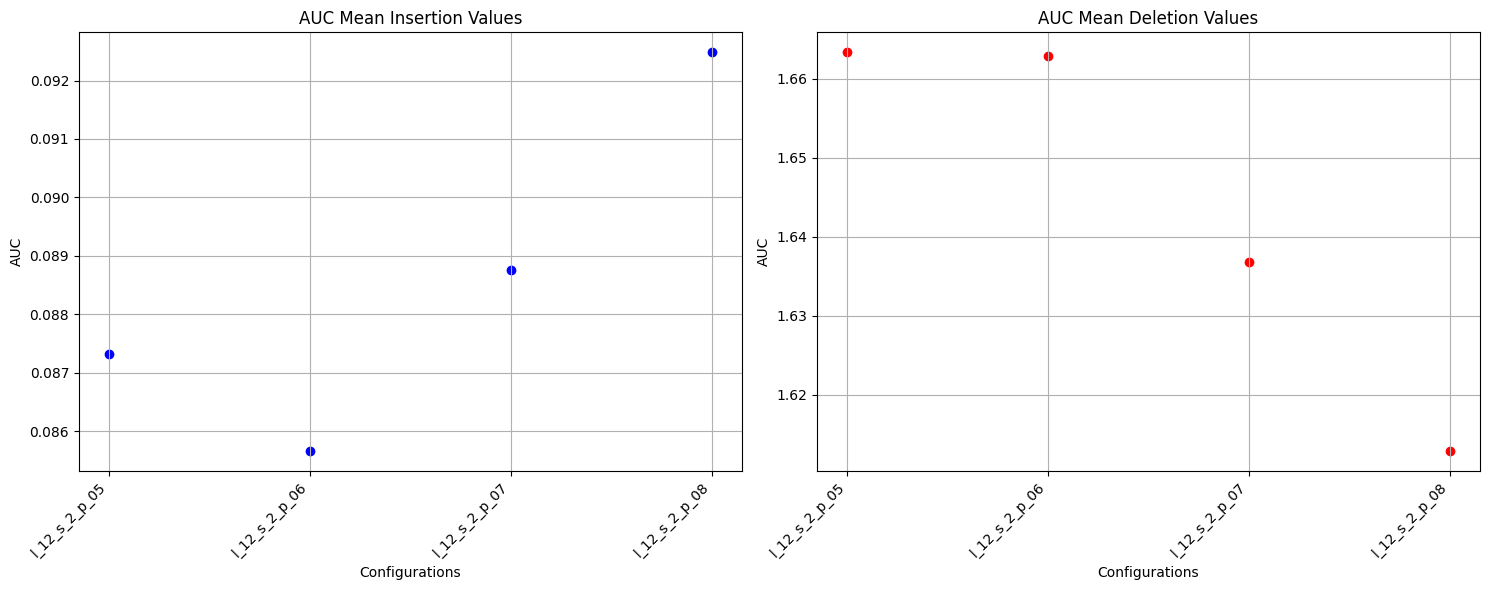

In [16]:
import pickle

base_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial_temporal/results/original_multiplicative_norm_zero/"
#path_to_load_results = os.path.join(work_path, "Water_Resources/rise-video/XAI/spatial/results/rise_original_multiplicative_norm_zero/results_setup_new_h_w_inv_sigmoide.pkl")

l = 12
s = 2
p_values = [5,6,7,8]

results_st = []
for p in p_values:
  path_to_load_results = f"st_results_setup_l_{l}_s_{s}_p_0{p}_exp_kern.pkl"
  # Load della lista results
  with open(base_path + path_to_load_results, 'rb') as file:
    result = pickle.load(file)
    results_st.append(result)

all_param_auc_insertion = []
all_param_auc_deletion  = []

for result in results_st:
    #result = result_st[0]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion = result["errors_deletion"]


    parameters = result["parameters_comb"]

    mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion, parameters,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Spatial: {parameters}")

    all_param_auc_insertion.append([mean_auc_insertion, parameters])
    all_param_auc_deletion.append([mean_auc_deletion,parameters])

total_auc_param_insertion.append(all_param_auc_insertion)
total_auc_param_deletion.append(all_param_auc_deletion)

plot_auc_comparison(all_param_auc_insertion, all_param_auc_deletion)

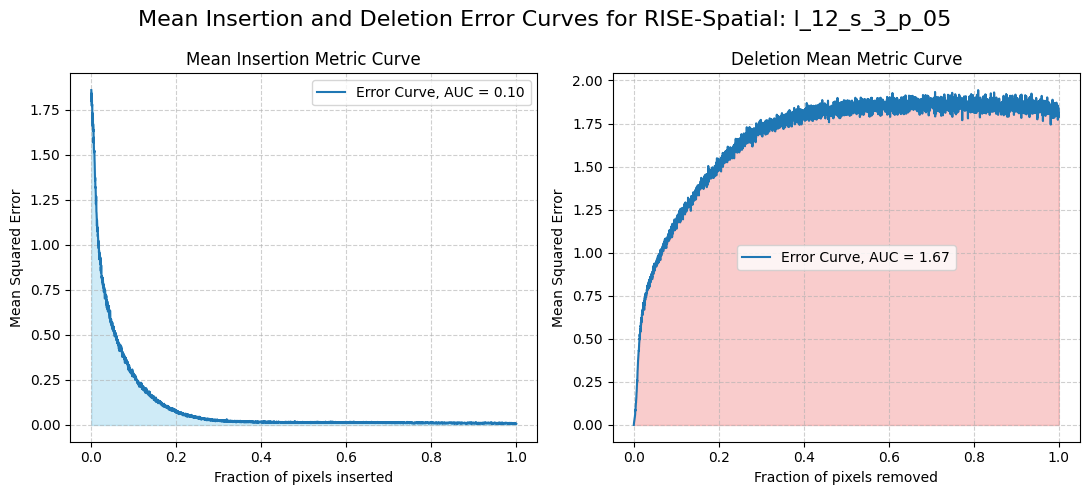

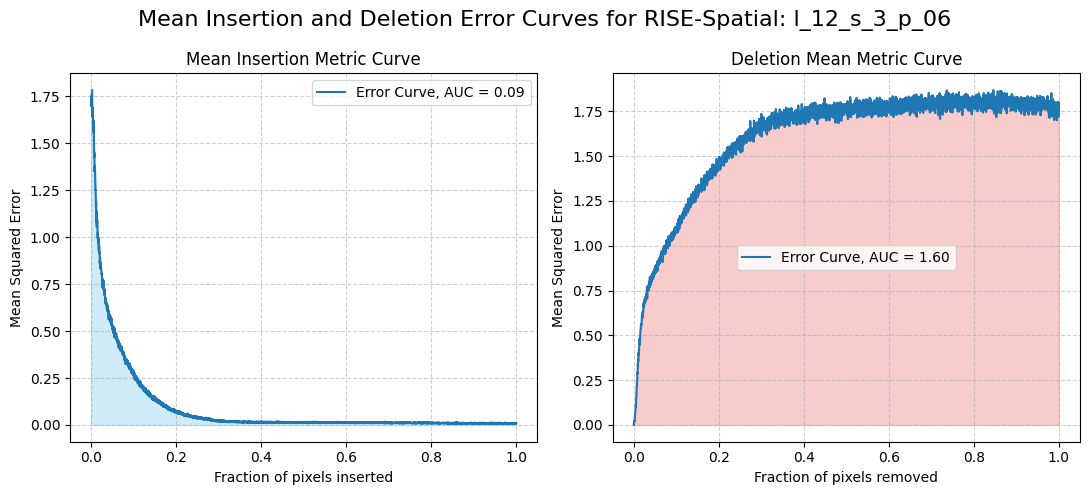

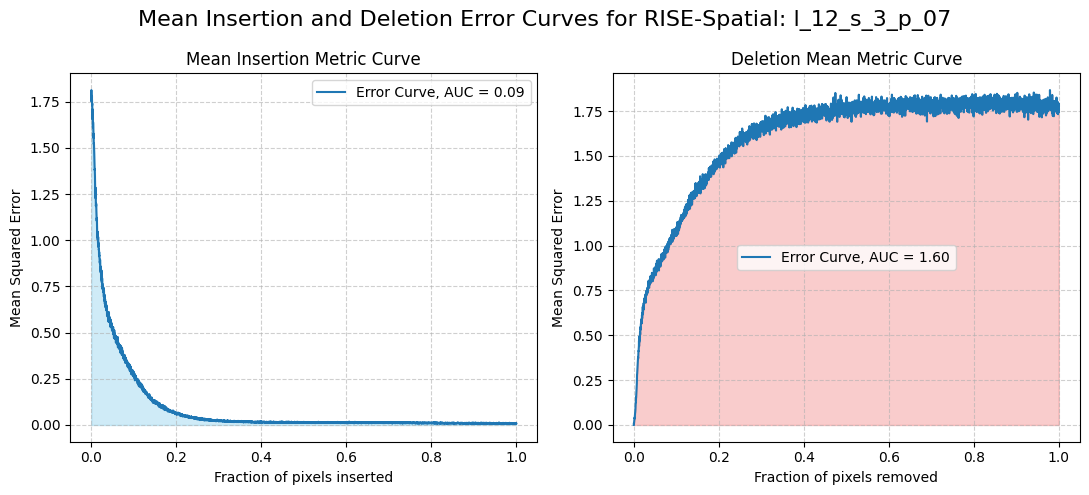

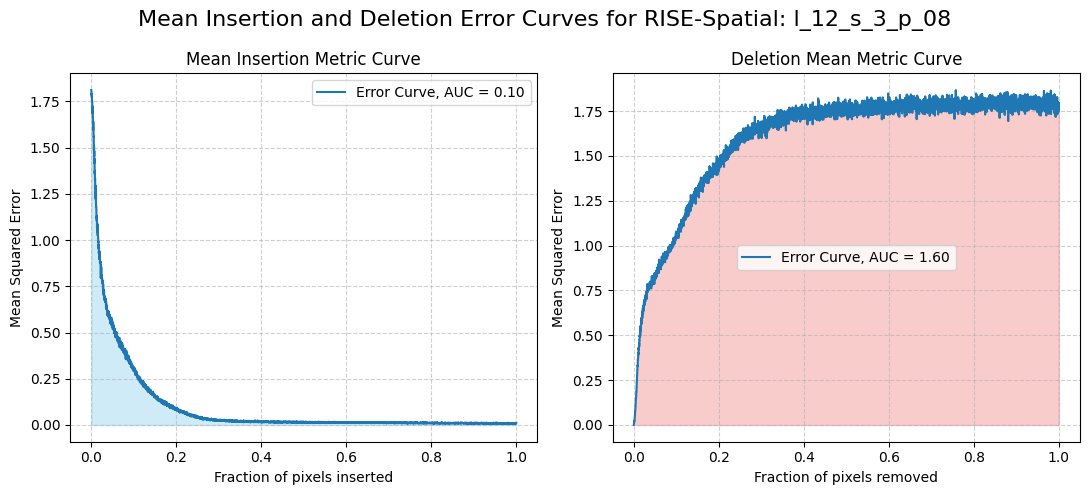

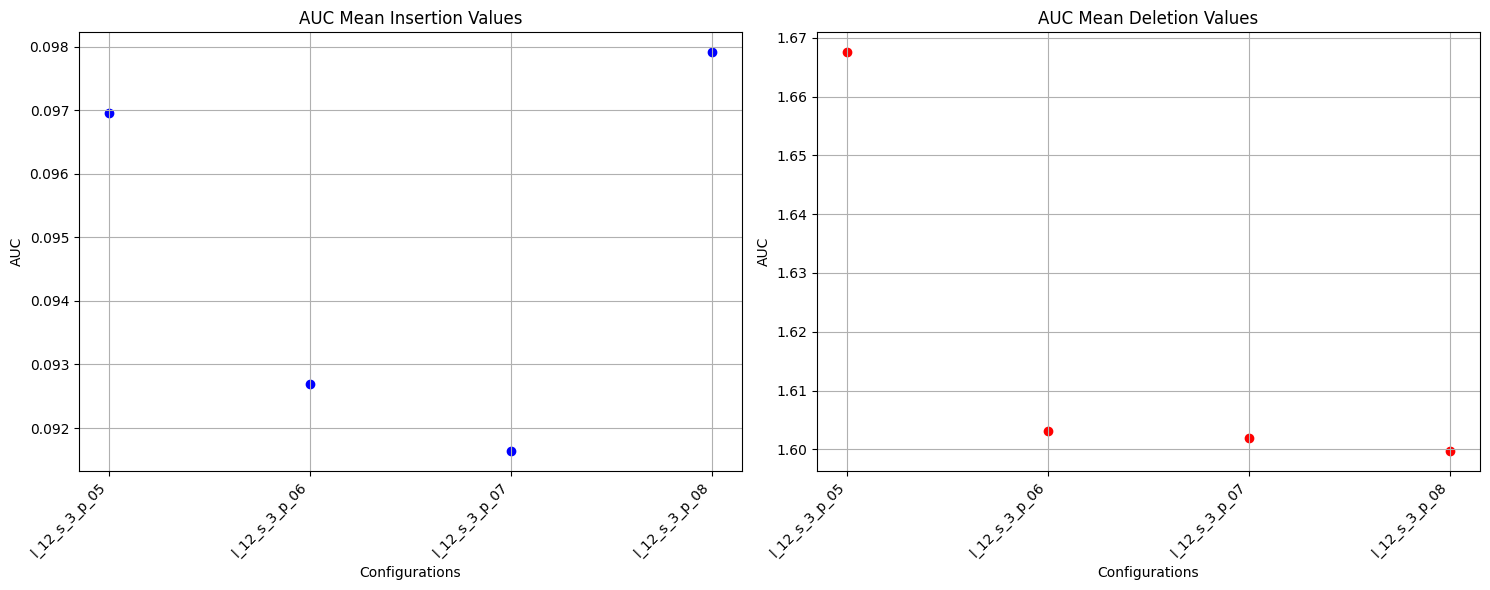

In [17]:
import pickle

base_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial_temporal/results/original_multiplicative_norm_zero/"
#path_to_load_results = os.path.join(work_path, "Water_Resources/rise-video/XAI/spatial/results/rise_original_multiplicative_norm_zero/results_setup_new_h_w_inv_sigmoide.pkl")

l = 12
s = 3
p_values = [5,6,7,8]

results_st = []
for p in p_values:
  path_to_load_results = f"st_results_setup_l_{l}_s_{s}_p_0{p}_exp_kern.pkl"
  # Load della lista results
  with open(base_path + path_to_load_results, 'rb') as file:
    result = pickle.load(file)
    results_st.append(result)

all_param_auc_insertion = []
all_param_auc_deletion  = []

for result in results_st:
    #result = result_st[0]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion = result["errors_deletion"]


    parameters = result["parameters_comb"]

    mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion, parameters,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Spatial: {parameters}")

    all_param_auc_insertion.append([mean_auc_insertion, parameters])
    all_param_auc_deletion.append([mean_auc_deletion,parameters])

total_auc_param_insertion.append(all_param_auc_insertion)
total_auc_param_deletion.append(all_param_auc_deletion)

plot_auc_comparison(all_param_auc_insertion, all_param_auc_deletion)

In [18]:
total_auc_param_insertion

[[[0.08731774893509214, 'l_12_s_2_p_05'],
  [0.08566103173319006, 'l_12_s_2_p_06'],
  [0.08876412255387851, 'l_12_s_2_p_07'],
  [0.09248463120471893, 'l_12_s_2_p_08']],
 [[0.09695460649887275, 'l_12_s_3_p_05'],
  [0.0926981140382167, 'l_12_s_3_p_06'],
  [0.09164112558169495, 'l_12_s_3_p_07'],
  [0.0979114897323843, 'l_12_s_3_p_08']]]

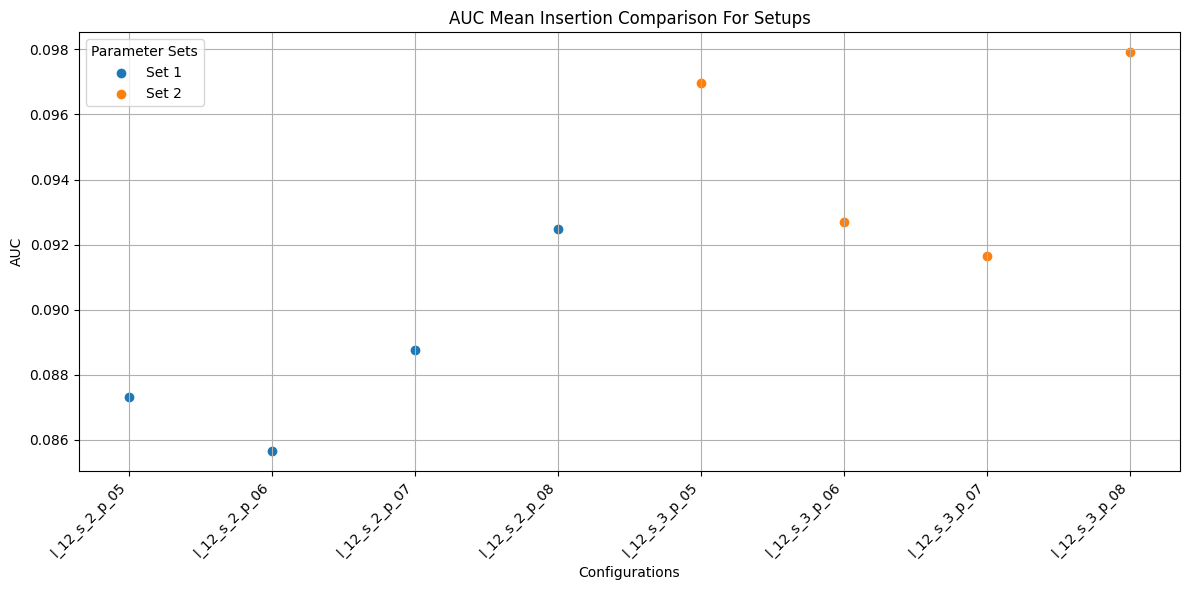

In [19]:
plot_multiple_auc_comparisons(total_auc_param_insertion, title="AUC Mean Insertion Comparison For Setups")

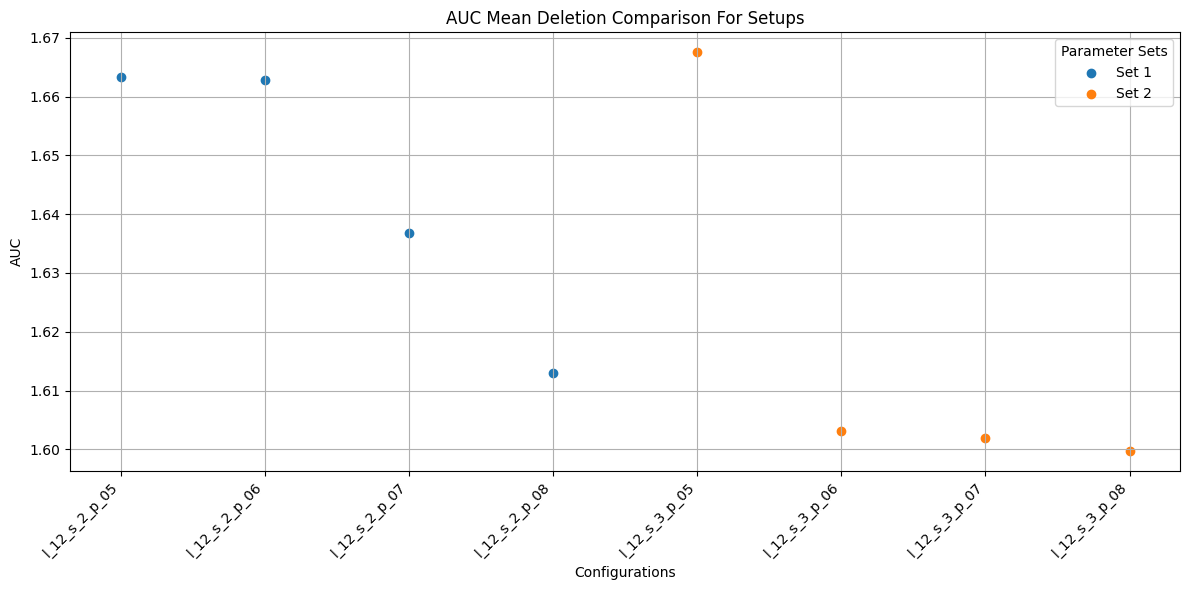

In [20]:
plot_multiple_auc_comparisons(total_auc_param_deletion, title="AUC Mean Deletion Comparison For Setups")

### *Diff_Pred (no abs)*

In [1]:
total_auc_param_insertion = []
total_auc_param_deletion  = []

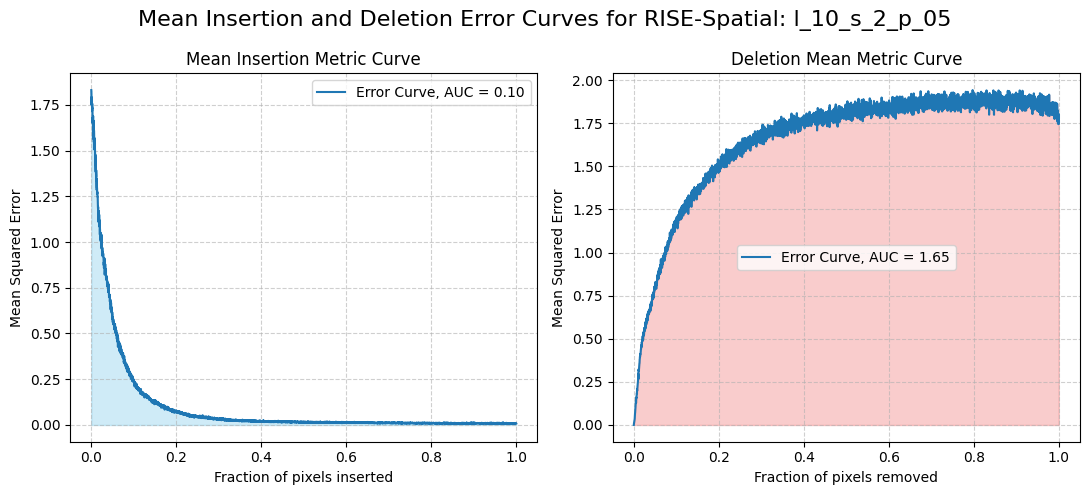

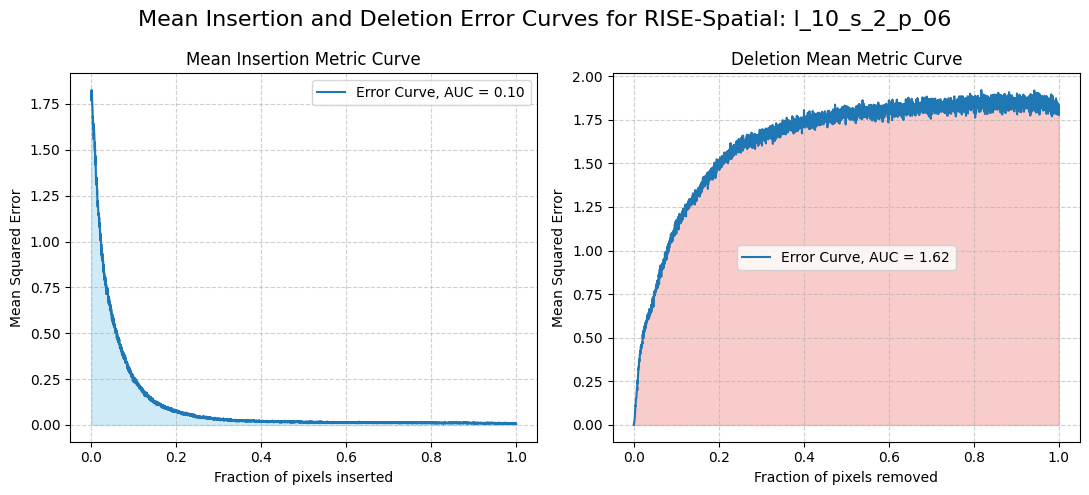

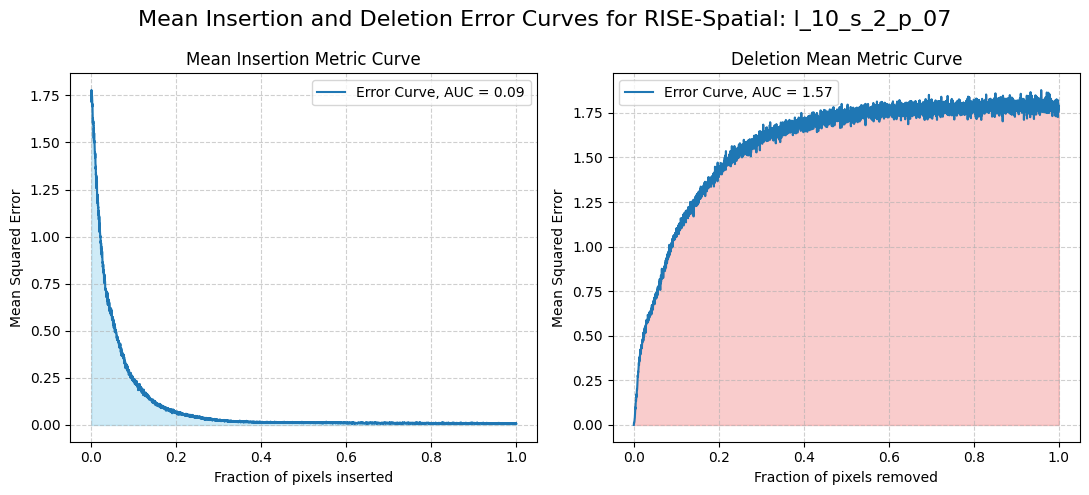

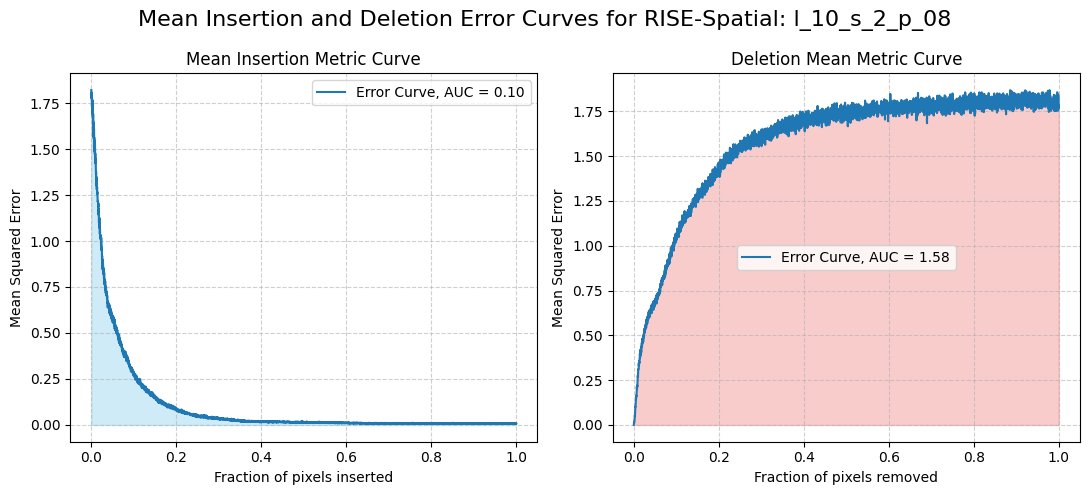

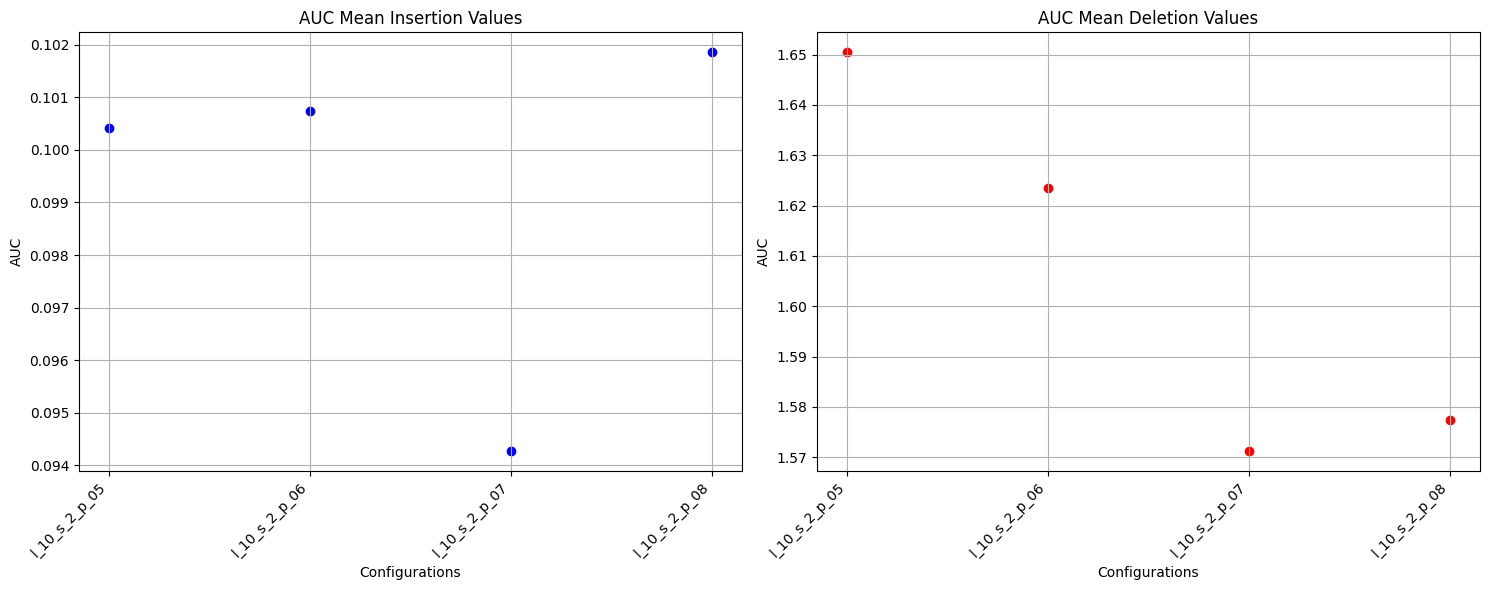

In [6]:
import pickle

base_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial_temporal/results/original_multiplicative_norm_zero/"
#path_to_load_results = os.path.join(work_path, "Water_Resources/rise-video/XAI/spatial/results/rise_original_multiplicative_norm_zero/results_setup_new_h_w_inv_sigmoide.pkl")

l = 10
s = 2
p_values = [5,6,7,8] # manca il 9

results_st = []
for p in p_values:
  path_to_load_results = f"st_results_setup_l_{l}_s_{s}_p_0{p}_diff_pred.pkl"
  # Load della lista results
  with open(base_path + path_to_load_results, 'rb') as file:
    result = pickle.load(file)
    results_st.append(result)

all_param_auc_insertion = []
all_param_auc_deletion  = []

for result in results_st:
    #result = result_st[0]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion = result["errors_deletion"]


    parameters = result["parameters_comb"]

    mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion, parameters,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Spatial: {parameters}")

    all_param_auc_insertion.append([mean_auc_insertion, parameters])
    all_param_auc_deletion.append([mean_auc_deletion,parameters])

total_auc_param_insertion.append(all_param_auc_insertion)
total_auc_param_deletion.append(all_param_auc_deletion)

plot_auc_comparison(all_param_auc_insertion, all_param_auc_deletion)

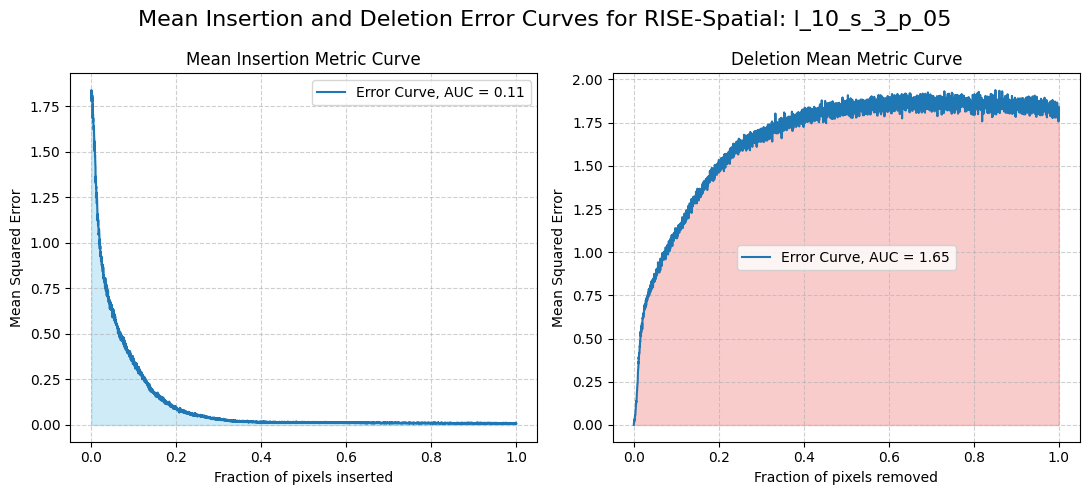

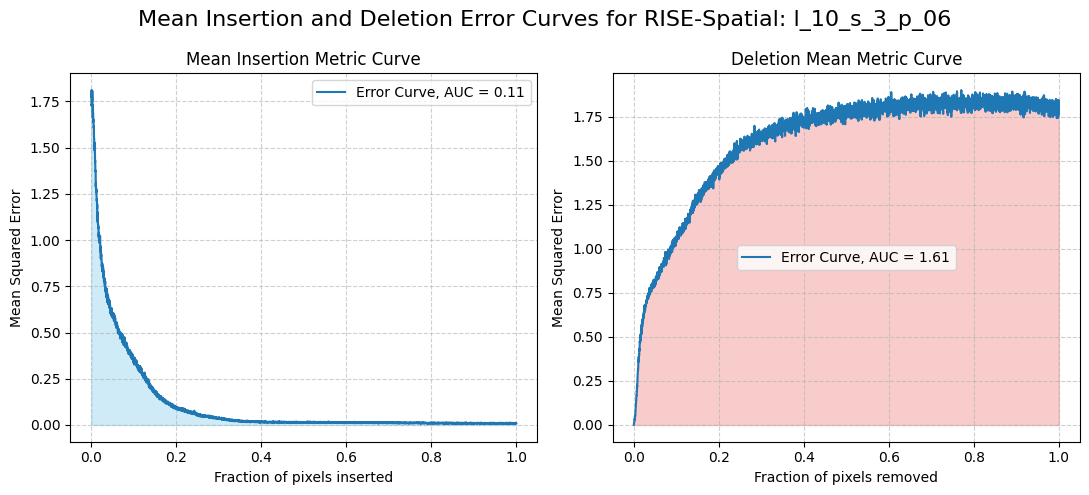

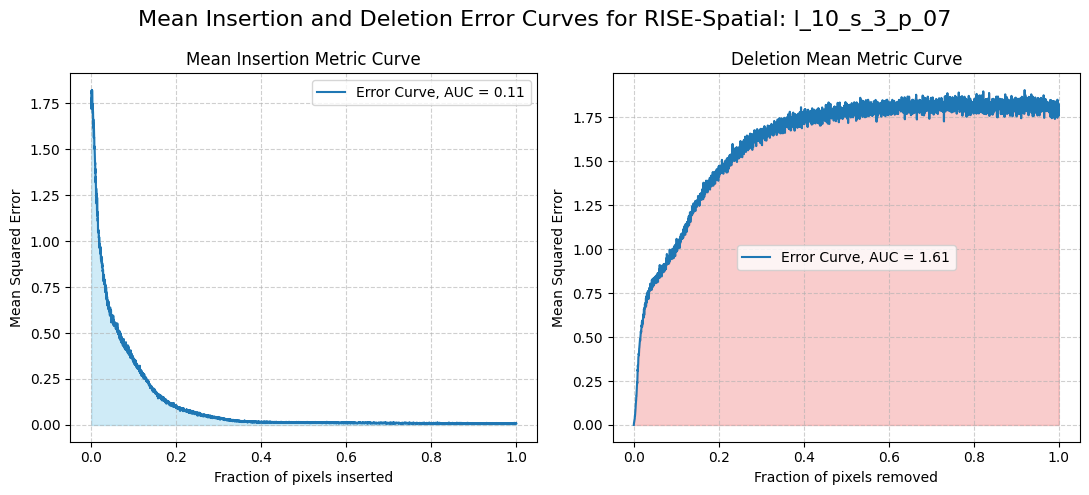

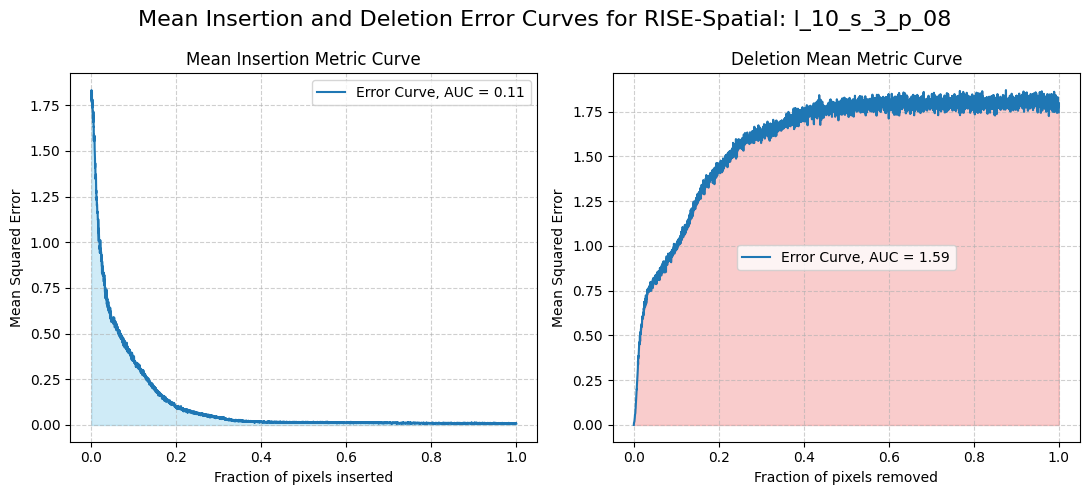

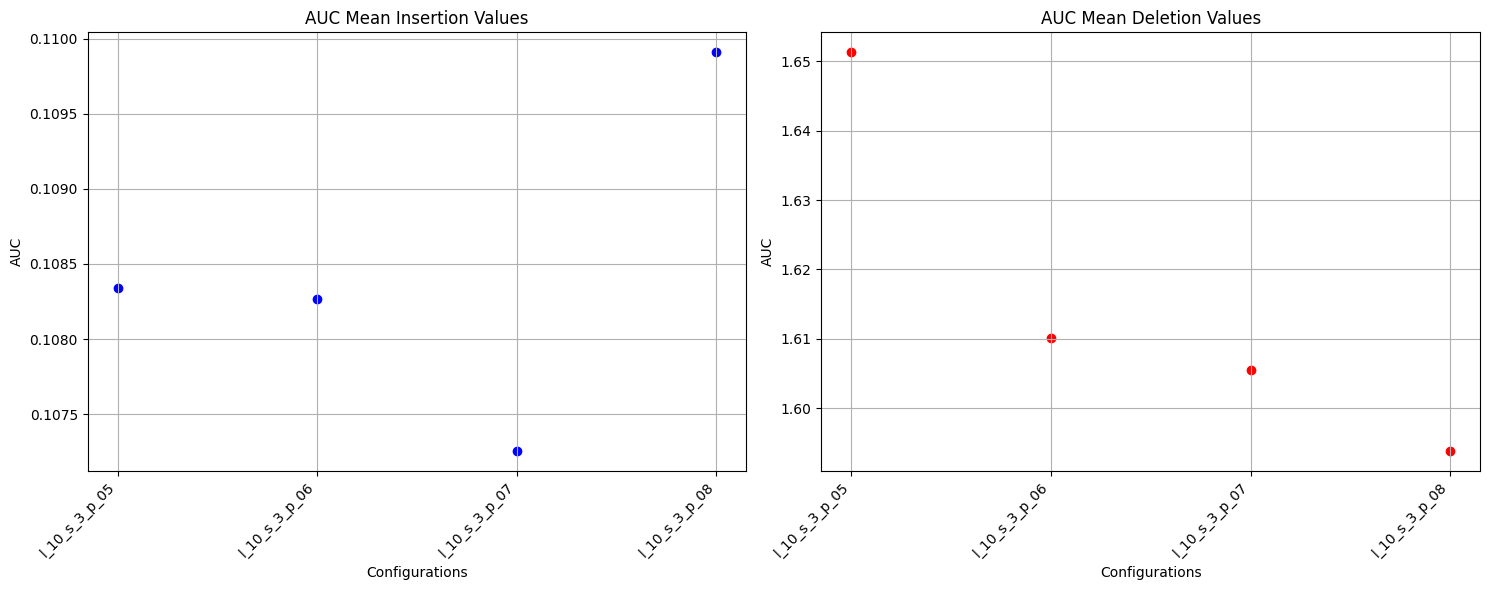

In [7]:
import pickle

base_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial_temporal/results/original_multiplicative_norm_zero/"
#path_to_load_results = os.path.join(work_path, "Water_Resources/rise-video/XAI/spatial/results/rise_original_multiplicative_norm_zero/results_setup_new_h_w_inv_sigmoide.pkl")

l = 10
s = 3
p_values = [5,6,7,8] # manca il 9

results_st = []
for p in p_values:
  path_to_load_results = f"st_results_setup_l_{l}_s_{s}_p_0{p}_diff_pred.pkl"
  # Load della lista results
  with open(base_path + path_to_load_results, 'rb') as file:
    result = pickle.load(file)
    results_st.append(result)

all_param_auc_insertion = []
all_param_auc_deletion  = []

for result in results_st:
    #result = result_st[0]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion = result["errors_deletion"]


    parameters = result["parameters_comb"]

    mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion, parameters,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Spatial: {parameters}")

    all_param_auc_insertion.append([mean_auc_insertion, parameters])
    all_param_auc_deletion.append([mean_auc_deletion,parameters])

total_auc_param_insertion.append(all_param_auc_insertion)
total_auc_param_deletion.append(all_param_auc_deletion)

plot_auc_comparison(all_param_auc_insertion, all_param_auc_deletion)

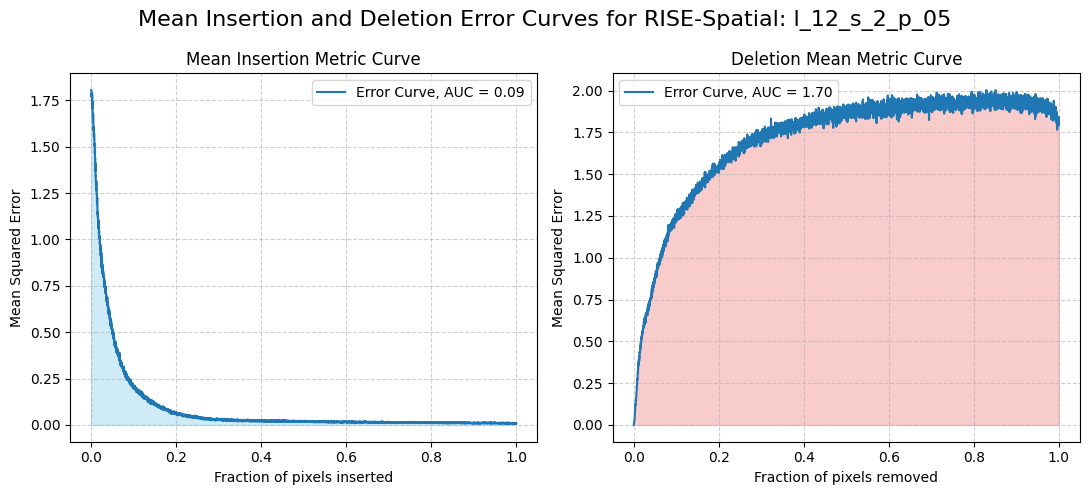

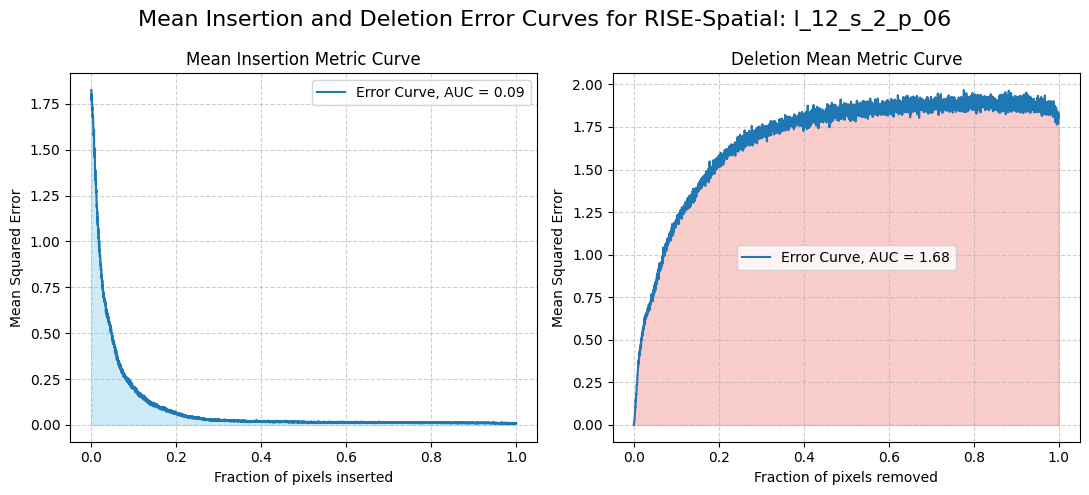

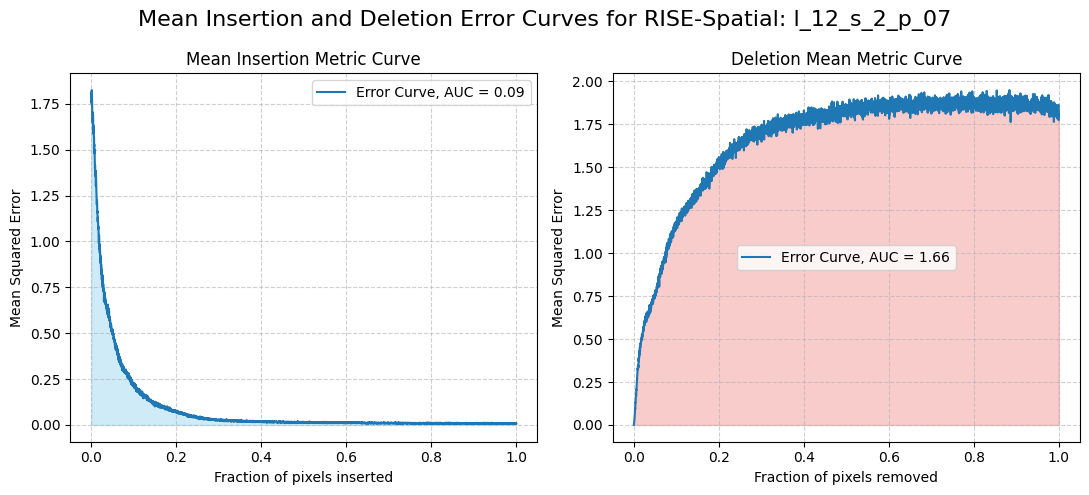

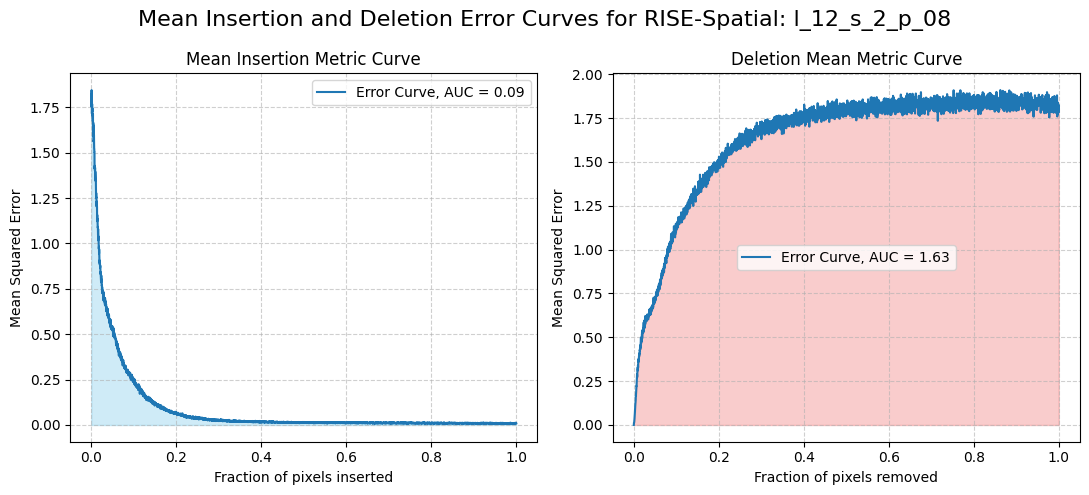

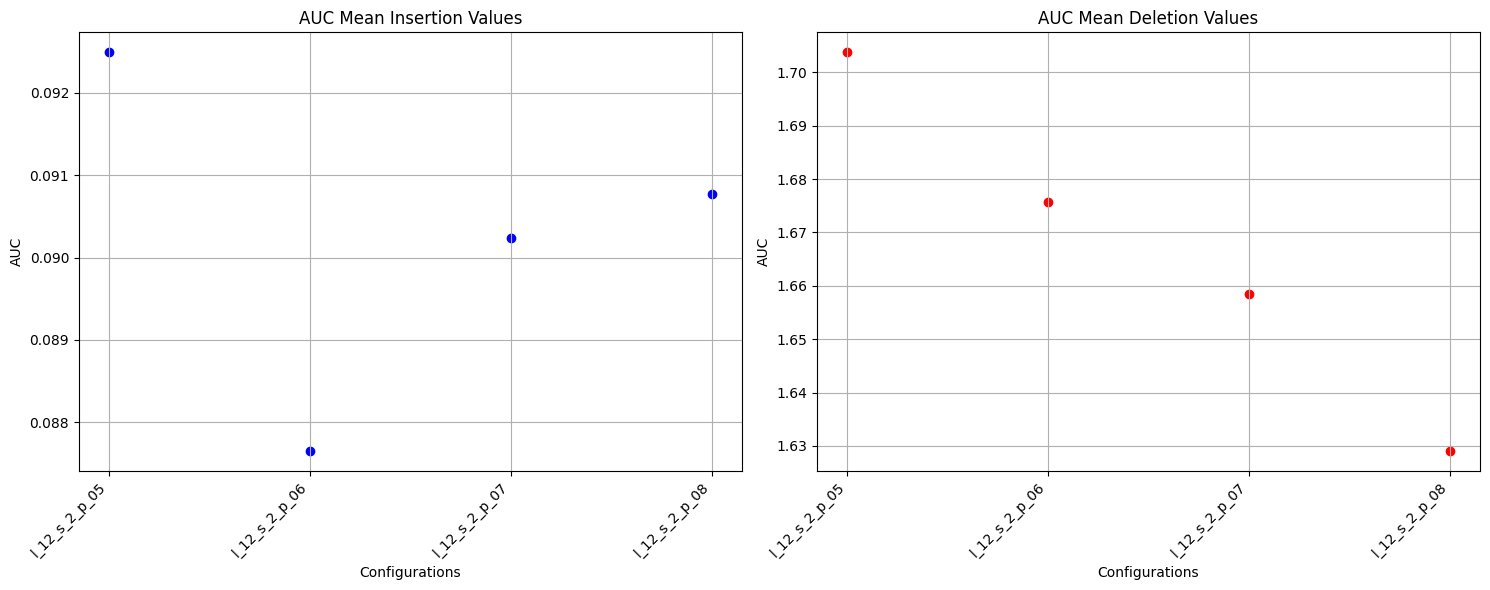

In [8]:
import pickle

base_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial_temporal/results/original_multiplicative_norm_zero/"
#path_to_load_results = os.path.join(work_path, "Water_Resources/rise-video/XAI/spatial/results/rise_original_multiplicative_norm_zero/results_setup_new_h_w_inv_sigmoide.pkl")

l = 12
s = 2
p_values = [5,6,7,8] # manca il 9

results_st = []
for p in p_values:
  path_to_load_results = f"st_results_setup_l_{l}_s_{s}_p_0{p}_diff_pred.pkl"
  # Load della lista results
  with open(base_path + path_to_load_results, 'rb') as file:
    result = pickle.load(file)
    results_st.append(result)

all_param_auc_insertion = []
all_param_auc_deletion  = []

for result in results_st:
    #result = result_st[0]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion = result["errors_deletion"]


    parameters = result["parameters_comb"]

    mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion, parameters,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Spatial: {parameters}")

    all_param_auc_insertion.append([mean_auc_insertion, parameters])
    all_param_auc_deletion.append([mean_auc_deletion,parameters])

total_auc_param_insertion.append(all_param_auc_insertion)
total_auc_param_deletion.append(all_param_auc_deletion)

plot_auc_comparison(all_param_auc_insertion, all_param_auc_deletion)

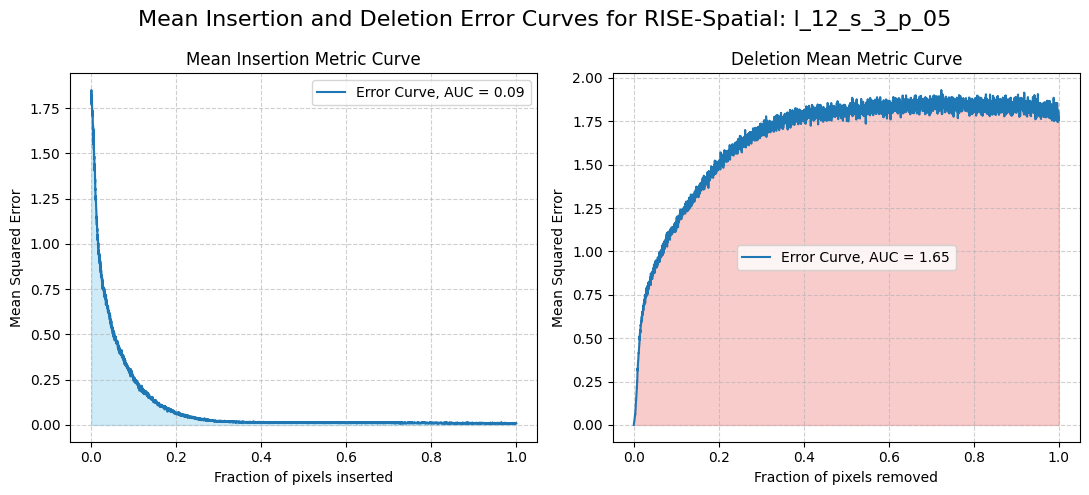

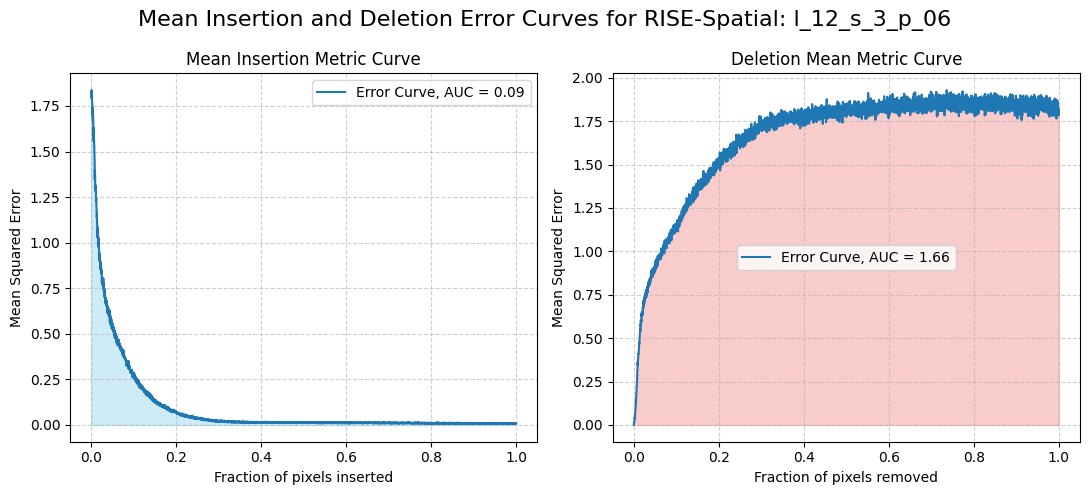

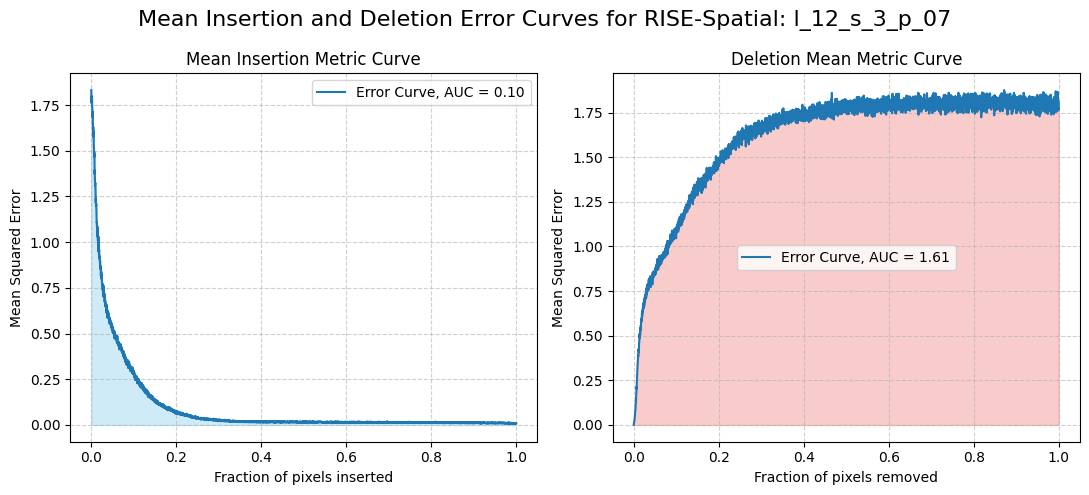

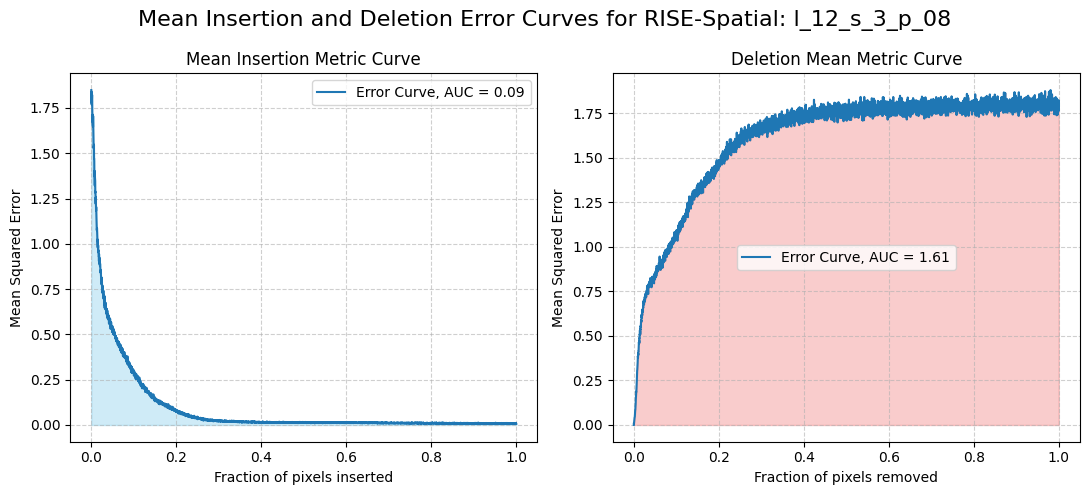

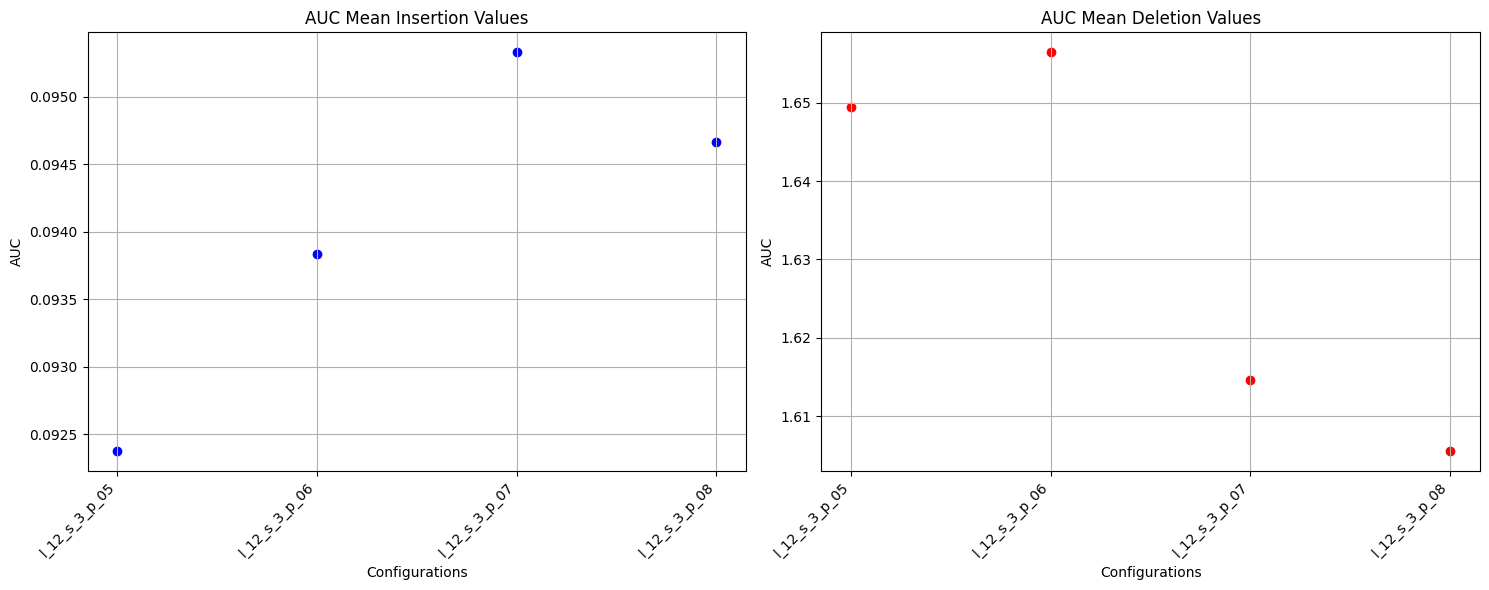

In [9]:
import pickle

base_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial_temporal/results/original_multiplicative_norm_zero/"
#path_to_load_results = os.path.join(work_path, "Water_Resources/rise-video/XAI/spatial/results/rise_original_multiplicative_norm_zero/results_setup_new_h_w_inv_sigmoide.pkl")

l = 12
s = 3
p_values = [5,6,7,8] # manca il 9

results_st = []
for p in p_values:
  path_to_load_results = f"st_results_setup_l_{l}_s_{s}_p_0{p}_diff_pred.pkl"
  # Load della lista results
  with open(base_path + path_to_load_results, 'rb') as file:
    result = pickle.load(file)
    results_st.append(result)

all_param_auc_insertion = []
all_param_auc_deletion  = []

for result in results_st:
    #result = result_st[0]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion = result["errors_deletion"]


    parameters = result["parameters_comb"]

    mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion, parameters,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Spatial: {parameters}")

    all_param_auc_insertion.append([mean_auc_insertion, parameters])
    all_param_auc_deletion.append([mean_auc_deletion,parameters])

total_auc_param_insertion.append(all_param_auc_insertion)
total_auc_param_deletion.append(all_param_auc_deletion)

plot_auc_comparison(all_param_auc_insertion, all_param_auc_deletion)

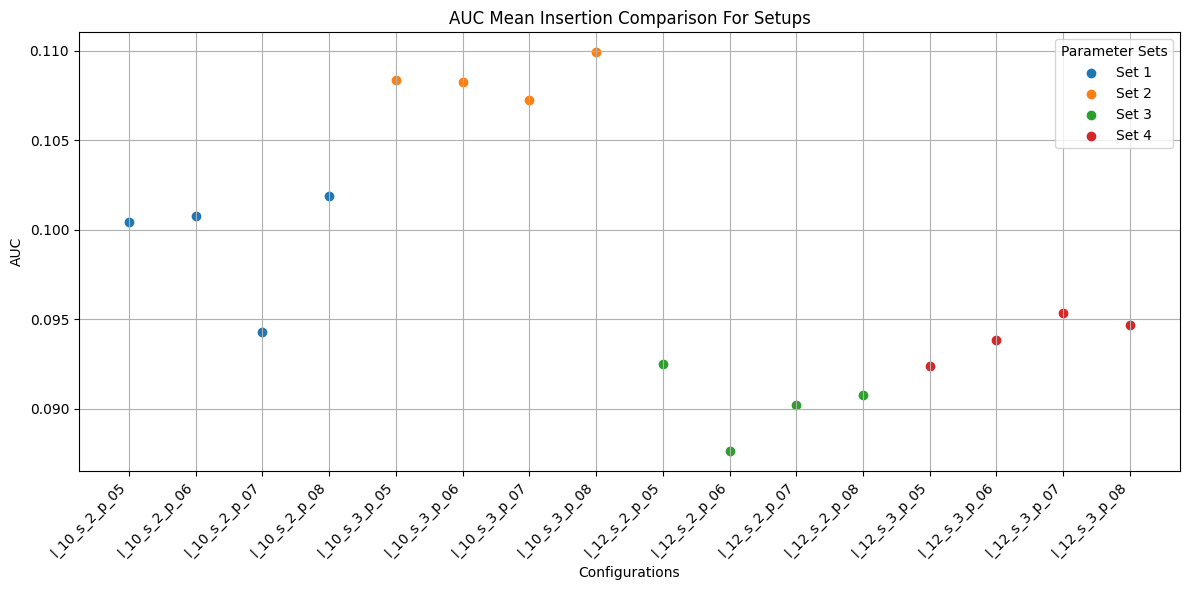

In [11]:
plot_multiple_auc_comparisons(total_auc_param_insertion, title="AUC Mean Insertion Comparison For Setups")

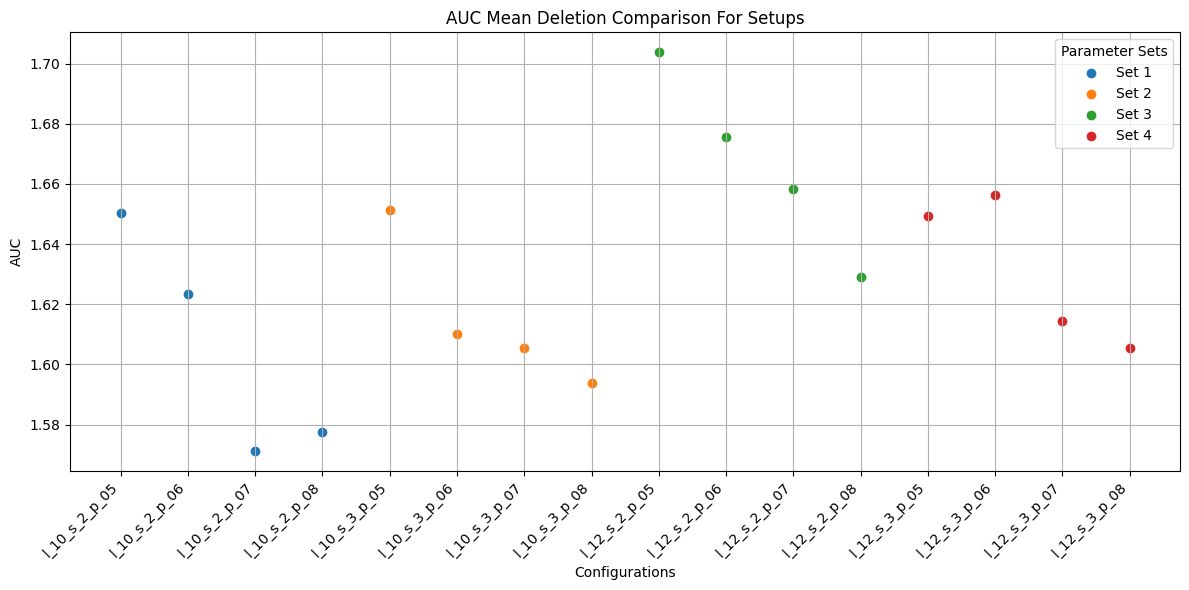

In [12]:
plot_multiple_auc_comparisons(total_auc_param_deletion, title="AUC Mean Deletion Comparison For Setups")

In [17]:
import pickle

base_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial_temporal/results/original_multiplicative_norm_zero/"
#path_to_load_results = os.path.join(work_path, "Water_Resources/rise-video/XAI/spatial/results/rise_original_multiplicative_norm_zero/results_setup_new_h_w_inv_sigmoide.pkl")

l = 12
s = 2

path_to_load_results = f"st_results_setup_l_{l}_s_{s}_p_0{6}_diff_pred.pkl"
# Load della lista results
with open(base_path + path_to_load_results, 'rb') as file:
    result_st_l_12_s2_p6 = pickle.load(file)
    #results_st.append(result)

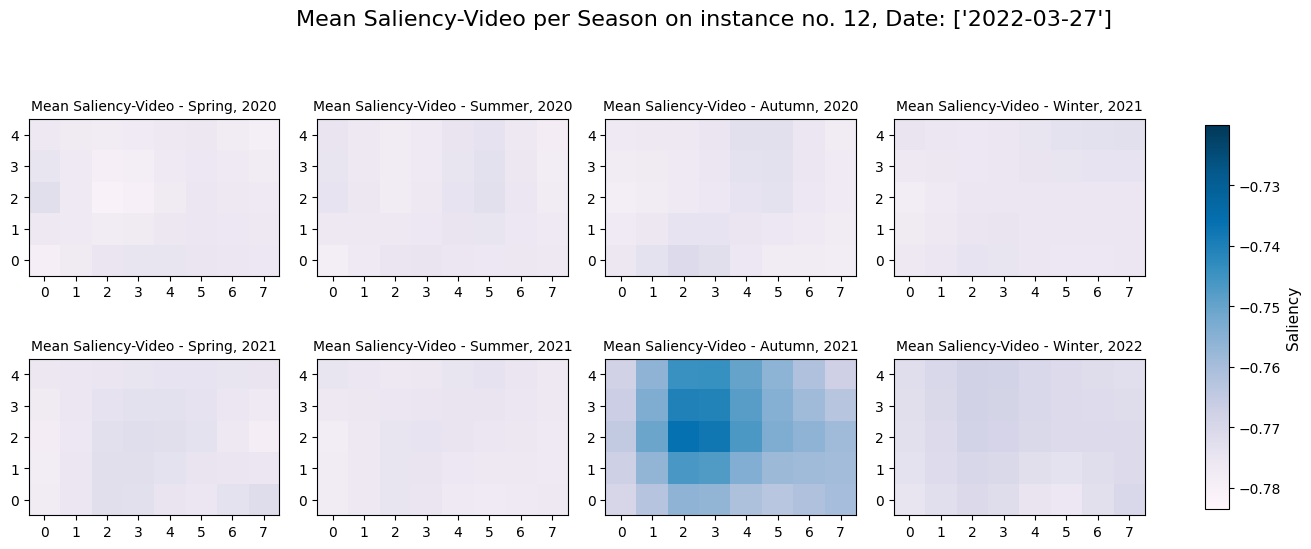

In [20]:
saliency_videos_l_12_s2_p6 = result_st_l_12_s2_p6['saliency_videos']

plot_sv_mean_per_season(saliency_videos_l_12_s2_p6[12], 12)

In [2]:
import numpy as np

M           = 10        # Nr di prove per testare la stabilità
seed_values = np.random.randint(1,100,5)

seed_values

array([30, 23, 91, 12, 58])